# FRED API Exercise

This notebook is meant to be a collection of sample code and simple analysis, using data provided by St Louis Federal Reserve's FRED API.

FRED API account is free and user can register for an API key for retrieving data

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QuantLib
from fredapi import Fred

In [3]:
os.getcwd()

'E:\\Workspace\\Programming\\Python'

In [4]:
# Input FRED API key here
# fred_key ="Your FRED API Key here"

fred = Fred(fred_key)

In [5]:
# Using plot style of 538
plt.style.use("fivethirtyeight")

Let's look up what data series is available for semiconductor

In [7]:
# Input search term and print column/data type
df = fred.search("Semiconductor")
print(df.columns)
print(df.dtypes)

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')
id                                   object
realtime_start               datetime64[ns]
realtime_end                 datetime64[ns]
title                                object
observation_start            datetime64[ns]
observation_end              datetime64[ns]
frequency                            object
frequency_short                      object
units                                object
units_short                          object
seasonal_adjustment                  object
seasonal_adjustment_short            object
last_updated                         object
popularity                           object
notes                                object
dtype: object


In [8]:
# sort by popularity
df["popularity"]= df["popularity"].astype(float)
df = df.sort_values("popularity", ascending = False)
print(df.head())

                      id realtime_start realtime_end  \
series id                                              
AMTMNO            AMTMNO     2024-09-04   2024-09-04   
PCU33443344  PCU33443344     2024-09-04   2024-09-04   
A34SNO            A34SNO     2024-09-04   2024-09-04   
AMTUNO            AMTUNO     2024-09-04   2024-09-04   
AMXDNO            AMXDNO     2024-09-04   2024-09-04   

                                                         title  \
series id                                                        
AMTMNO          Manufacturers' New Orders: Total Manufacturing   
PCU33443344  Producer Price Index by Industry: Semiconducto...   
A34SNO       Manufacturers' New Orders: Computers and Elect...   
AMTUNO       Manufacturers' New Orders: Manufacturing with ...   
AMXDNO       Manufacturers' New Orders: Manufacturing Exclu...   

            observation_start observation_end frequency frequency_short  \
series id                                                            

## Semiconductor Time Series

We are going to look the historical import and export price of semiconductor
IZ3344   Import Price Index (NAICS): Semiconductor and Other Electronic Component Manufacturing
IY3344   Export Price Index (NAICS): Semiconductor and Other Electronic Component Manufacturing

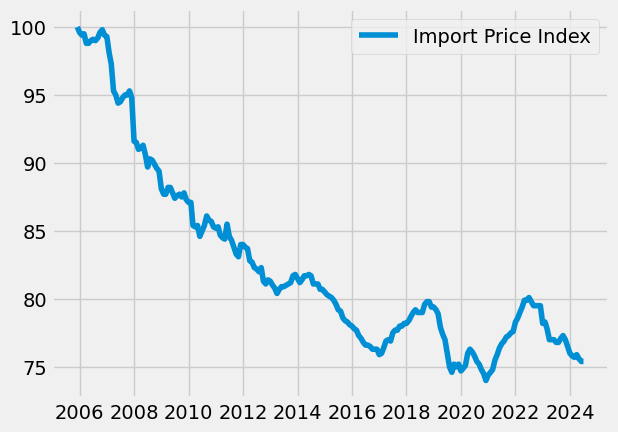

In [10]:
# Import Price Index
IZ3344 = fred.get_series("IZ3344")
IZ3344 = IZ3344.dropna()
#Filtering the data for the period more that 1st Jan 2000
date_start = IZ3344.index > "2000-01-01"
IZ3344 = IZ3344[date_start]
plt.plot(IZ3344.index, IZ3344.values, label="Import Price Index")
plt.legend()

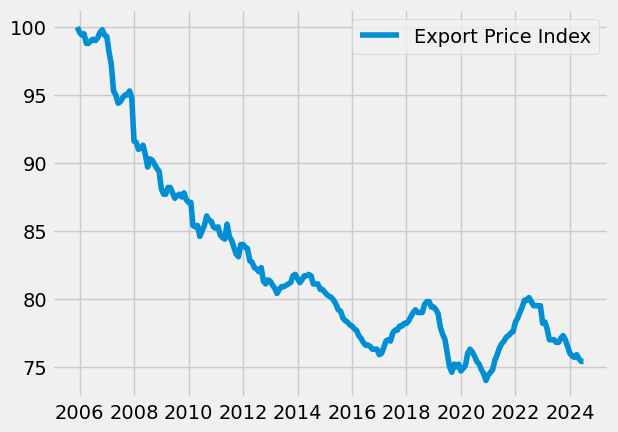

In [11]:
IY3344 = fred.get_series("IZ3344")
IY3344 = IY3344.dropna()
#Filtering the data for the period more that 1st Jan 2000
date_start = IY3344.index > "2000-01-01"
IY3344 = IY3344[date_start]
plt.plot(IY3344.index, IY3344.values, label="Export Price Index")
plt.legend()

In [12]:
#join two time series into a dataframe
IZ3344.name = 'IZ3344'
IY3344.name = 'IY3344'
df_conduct_imex = IZ3344.to_frame().join(IY3344)
df_conduct_imex.head()

,IZ3344,IY3344
2005-12-01,100.0,100.0
2006-01-01,99.6,99.6
2006-02-01,99.4,99.4
2006-03-01,99.5,99.5
2006-04-01,98.8,98.8


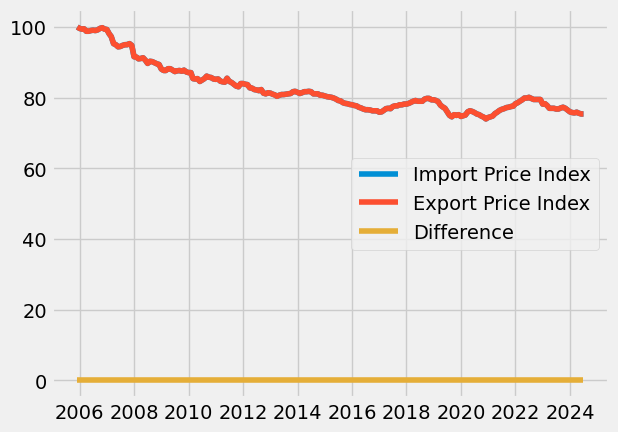

In [13]:
plt.plot(IZ3344.index, IZ3344.values, label="Import Price Index")
plt.plot(IY3344.index, IY3344.values, label="Export Price Index")
plt.plot(IY3344.index, IY3344.values-IZ3344.values, label="Difference")
plt.legend()
plt.show()

Import and Export Price Index have been the same.

Let's look at Manufacturers' New Orders: Computers and Electronic Products (A34SNO) as well as All Employees, Semiconductor and Other Electronic Component Manufacturing (CES3133440001) (in thousands)

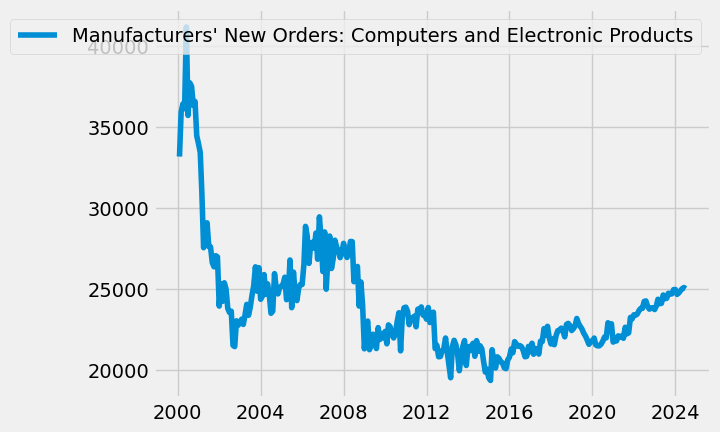

In [16]:
# Manufacturers' New Orders: Computers and Electronic Products 
A34SNO = fred.get_series("A34SNO")
A34SNO = A34SNO.dropna()
#Filtering the data for the period more that 1st Jan 2000
date_start = A34SNO.index > "2000-01-01"
A34SNO = A34SNO[date_start]
plt.plot(A34SNO.index, A34SNO.values, label="Manufacturers' New Orders: Computers and Electronic Products")
plt.legend()

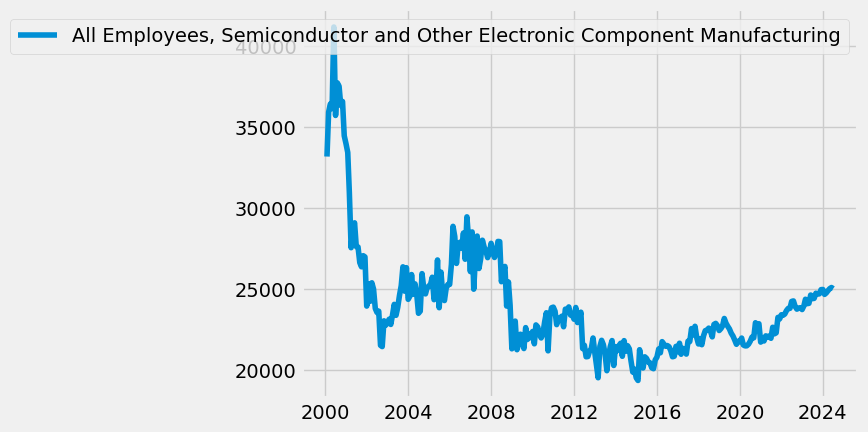

In [17]:
# All Employees, Semiconductor and Other Electronic Component Manufacturing
CES3133440001 = fred.get_series("CES3133440001")
CES3133440001 = CES3133440001.dropna()
#Filtering the data for the period more that 1st Jan 2000
date_start = CES3133440001.index > "2000-01-01"
CES3133440001 = CES3133440001[date_start]
plt.plot(CES3133440001.index, A34SNO.values, label="All Employees, Semiconductor and Other Electronic Component Manufacturing")
plt.legend()

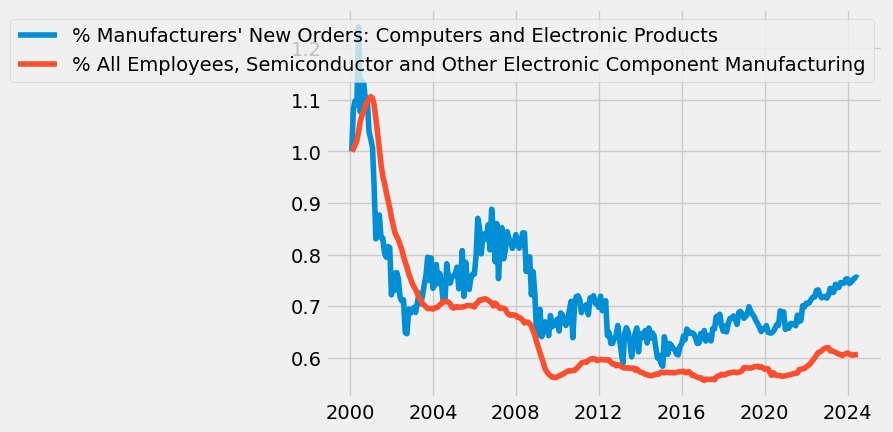

In [18]:
plt.plot(A34SNO.index, A34SNO.values/A34SNO.values[0], label="% Manufacturers' New Orders: Computers and Electronic Products")
plt.plot(CES3133440001.index, CES3133440001.values/CES3133440001.values[0], label="% All Employees, Semiconductor and Other Electronic Component Manufacturing")
#plt.plot(IY3344.index, IY3344.values-IZ3344.values, label="Difference")
plt.legend()
plt.show()

It seems that changes in Manufacturer's new orders and changes in employments in the semiconductor manufacturing sectors are quite consistent.  Both time series have 2000-01-01 values as base values.

Let's calculate the correlation between the two adjusted time series

In [20]:
#Correlation between Manufacturers' New Orders: Computers and Electronic Products (A34SNO) 
#and as well as All Employees, Semiconductor and Other Electronic Component Manufacturing (CES3133440001)
#with 2020-01-01 as base values
correlation_number = np.corrcoef((A34SNO.values/A34SNO.values[0]),(CES3133440001.values/CES3133440001.values[0]))
print(correlation_number)

[[1.         0.84243915]
 [0.84243915 1.        ]]


The correlation is at 0.84